# Paquetes y librerias

In [1]:
install.packages("ISLR")
install.packages("tidyverse")
install.packages("Hmisc")
install.packages("sna")
install.packages("igraph")
install.packages("network")
install.packages("readr")
install.packages("ergm")
install.packages("tergm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’, ‘network’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("igraph"):
“installation of package ‘igraph’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rb

In [3]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("igraph"):
“installation of package ‘igraph’ had non-zero exit status”


In [2]:
library(ISLR)
library(tidyverse)
library(Hmisc)
library(sna)
library(igraph)
library(network)
library(readr)
library(ergm)
library(tergm)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network


‘network’ 1.18.2 (2023-12-04), part of the Statnet Project
* ‘news(package="network")’ for changes 

ERROR: Error in library(igraph): there is no package called ‘igraph’


# Datos

In [ ]:
url <- "https://raw.githubusercontent.com/usuario/repo/main/datos.csv"
datos <- read.csv(url)

In [ ]:
df = df1[,-c(1)]

In [ ]:
str(df)

'data.frame':	31648 obs. of  17 variables:
 $ Age                  : int  58 44 33 47 35 28 42 58 43 53 ...
 $ Job                  : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ Marital.Status       : chr  "married" "single" "married" "married" ...
 $ Education            : chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ Credit               : chr  "no" "no" "no" "no" ...
 $ Balance..euros.      : int  2143 29 2 1506 231 447 2 121 593 6 ...
 $ Housing.Loan         : chr  "yes" "yes" "yes" "yes" ...
 $ Personal.Loan        : chr  "no" "no" "yes" "no" ...
 $ Contact              : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ Last.Contact.Day     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Last.Contact.Month   : chr  "may" "may" "may" "may" ...
 $ Last.Contact.Duration: int  261 151 76 92 139 217 380 50 55 517 ...
 $ Campaign             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Pdays                : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ Previous             : in

In [ ]:
unique(df$Job)
unique(df$Marital.Status)
unique(df$Education)
unique(df$Credit)
unique(df$Housing.Loan)
unique(df$Personal.Loan)
unique(df$Contact)
unique(df$Poutcome)

[1] "management"    "technician"    "entrepreneur"  "blue-collar"  
 [5] "retired"       "services"      "admin."        "self-employed"
 [9] "unemployed"    "housemaid"     "student"       "unknown"

[1] "married"  "single"   "divorced"

[1] "tertiary"  "secondary" "unknown"   "primary"

[1] "no"  "yes"

[1] "yes" "no"

[1] "no"  "yes"

[1] "unknown"   "cellular"  "telephone"

[1] "unknown" "failure" "other"   "success"

In [ ]:
summary(df)

      Age            Job            Marital.Status      Education        
 Min.   :18.00   Length:31648       Length:31648       Length:31648      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.93                                                           
 3rd Qu.:48.00                                                           
 Max.   :95.00                                                           
    Credit          Balance..euros.  Housing.Loan       Personal.Loan     
 Length:31648       Min.   : -8019   Length:31648       Length:31648      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   452   Mode  :character   Mode  :character  
                    Mean   :  1377                                        
                    3rd Qu.:  1438                                        
                    Max.   :1021

In [ ]:
df2 <- as.data.frame(df)

In [ ]:
df2[] <- data.matrix(df2)

In [ ]:
str(df2)

'data.frame':	31648 obs. of  17 variables:
 $ Age                  : int  58 44 33 47 35 28 42 58 43 53 ...
 $ Job                  : int  5 10 3 2 5 5 3 6 10 10 ...
 $ Marital.Status       : int  2 3 2 2 2 3 1 2 3 2 ...
 $ Education            : int  3 2 2 4 3 3 3 1 2 2 ...
 $ Credit               : int  1 1 1 1 1 1 2 1 1 1 ...
 $ Balance..euros.      : int  2143 29 2 1506 231 447 2 121 593 6 ...
 $ Housing.Loan         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Personal.Loan        : int  1 1 2 1 1 2 1 1 1 1 ...
 $ Contact              : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Last.Contact.Day     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Last.Contact.Month   : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Last.Contact.Duration: int  261 151 76 92 139 217 380 50 55 517 ...
 $ Campaign             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Pdays                : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ Previous             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Poutcome             : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Subscription        

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


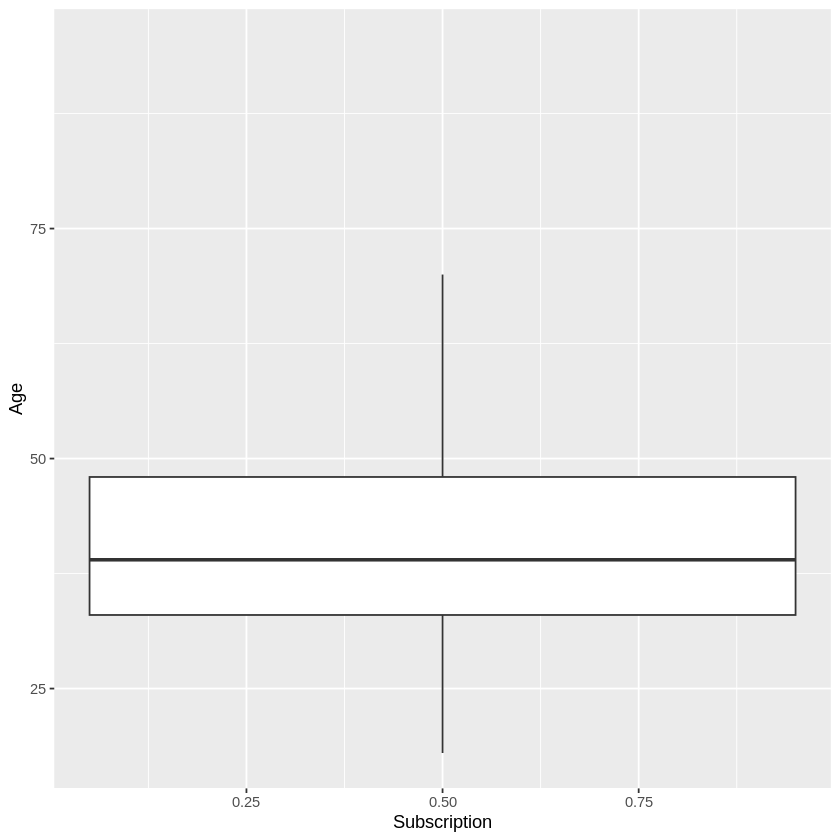

In [ ]:
ggplot(data = df, aes(x = Subscription, y = Age)) +
  geom_boxplot(outlier.shape = NA) +
  theme(legend.position = "null")

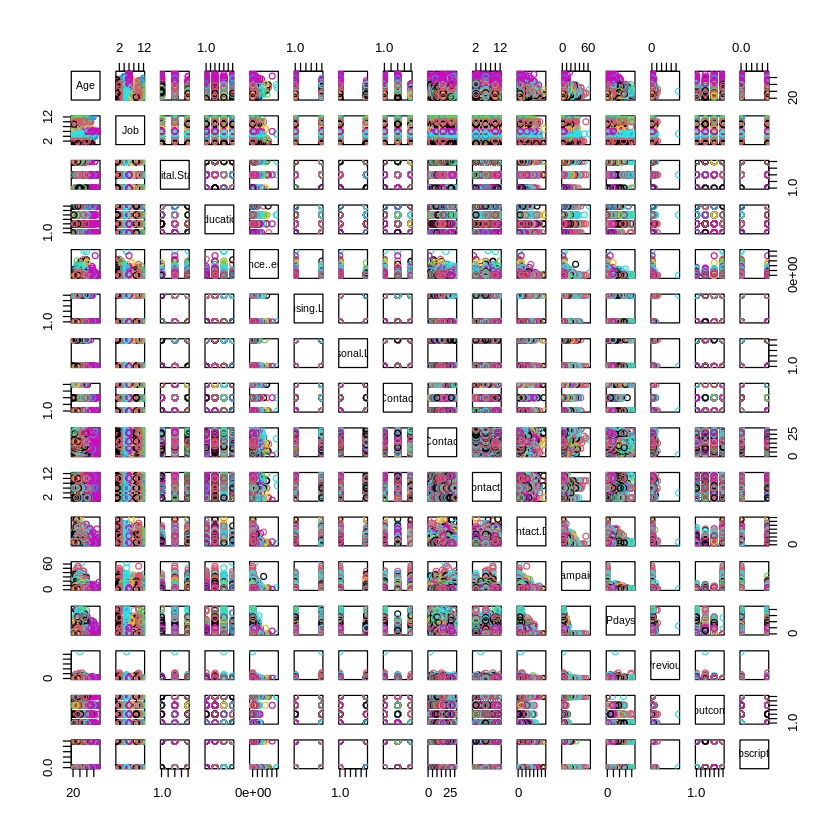

In [ ]:
pairs(x = df2[, -5], col = df2$Job)

In [ ]:
test <- read.csv("Test bank.csv")

In [ ]:
sum(df2$Subscription)

[1] 3697

In [ ]:
negados <- df2[df2$Subscription==0,]

In [ ]:
dados <- df2[df2$Subscription==1,]

In [ ]:
negados <- negados[1:18000,]

In [ ]:
df5 <- rbind(dados,negados)

In [ ]:
df5

# Regresión QAP

In [ ]:
str(df)

'data.frame':	31648 obs. of  17 variables:
 $ Age                  : int  58 44 33 47 35 28 42 58 43 53 ...
 $ Job                  : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ Marital.Status       : chr  "married" "single" "married" "married" ...
 $ Education            : chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ Credit               : chr  "no" "no" "no" "no" ...
 $ Balance..euros.      : int  2143 29 2 1506 231 447 2 121 593 6 ...
 $ Housing.Loan         : chr  "yes" "yes" "yes" "yes" ...
 $ Personal.Loan        : chr  "no" "no" "yes" "no" ...
 $ Contact              : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ Last.Contact.Day     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Last.Contact.Month   : chr  "may" "may" "may" "may" ...
 $ Last.Contact.Duration: int  261 151 76 92 139 217 380 50 55 517 ...
 $ Campaign             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Pdays                : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ Previous             : in

In [ ]:
modelo_logistico <- glm(Subscription ~ ., data = df[,-c(1,5,14,15)], family = "binomial")
summary(modelo_logistico)


Call:
glm(formula = Subscription ~ ., family = "binomial", data = df[, 
    -c(1, 5, 14, 15)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8824  -0.3799  -0.2555  -0.1499   3.5425  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.400e+00  1.538e-01 -15.601  < 2e-16 ***
Jobblue-collar        -2.585e-01  8.702e-02  -2.970 0.002978 ** 
Jobentrepreneur       -4.425e-01  1.531e-01  -2.890 0.003847 ** 
Jobhousemaid          -6.351e-01  1.692e-01  -3.753 0.000175 ***
Jobmanagement         -9.573e-02  8.774e-02  -1.091 0.275252    
Jobretired             2.015e-01  1.057e-01   1.906 0.056597 .  
Jobself-employed      -2.694e-01  1.337e-01  -2.015 0.043924 *  
Jobservices           -1.557e-01  9.928e-02  -1.569 0.116719    
Jobstudent             3.798e-01  1.273e-01   2.985 0.002837 ** 
Jobtechnician         -1.413e-01  8.278e-02  -1.707 0.087842 .  
Jobunemployed         -8.482e-02  1.300e-01  -0.652 0.514106

Al observar los resultados podemos ver que para una significancia del 5% todas las variables son significativas. Para obtener intervalos de confianza de los coeficientes estimados se puede utilizar la función confint. Esta función necesita que se le indique el modelo que fue estimado y opcionalmente el nivel de confianza que se desea utilizar, de lo contario utiliza por defecto un nivel de confianza del 95%.

In [ ]:
proyectado<-ifelse(modelo_logistico$fitted.values>0.5,1,0)
table(df$Subscription, proyectado)

   proyectado
        0     1
  0 27284   667
  1  2439  1258

Sin embargo, para poder interpretar el valor estimado de los coeficientes es necesario utilizar la función exponencial eβi

In [ ]:
exp(modelo_logistico$coefficients)

(Intercept)        Jobblue-collar       Jobentrepreneur 
           0.09071891            0.77223751            0.64240183 
         Jobhousemaid         Jobmanagement            Jobretired 
           0.52987427            0.90870649            1.22328415 
     Jobself-employed           Jobservices            Jobstudent 
           0.76385090            0.85577494            1.46204350 
        Jobtechnician         Jobunemployed            Jobunknown 
           0.86822456            0.91867493            0.85185660 
Marital.Statusmarried  Marital.Statussingle    Educationsecondary 
           0.85534485            1.15492844            1.18243317 
    Educationtertiary      Educationunknown       Balance..euros. 
           1.40655963            1.25553082            1.00001540 
      Housing.Loanyes      Personal.Loanyes      Contacttelephone 
           0.50341492            0.65597020            0.94191238 
       Contactunknown      Last.Contact.Day Last.Contact.Monthaug 
           0.19643727            1.00745371            0.49736522 
Last.Contact.Monthdec Last.Contact.Monthfeb Last.Contact.Monthjan 
           1.49381889            0.74062808            0.28188027 
Last.Contact.Monthjul Last.Contact.Monthjun Last.Contact.Monthmar 
           0.40042883            1.47688716            4.37656056 
Last.Contact.Monthmay Last.Contact.Monthnov Last.Contact.Monthoct 
           0.64272697            0.40954889            1.97557437 
Last.Contact.Monthsep Last.Contact.Duration              Campaign 
           2.19908929            1.00418334            0.90452027 
        Poutcomeother       Poutcomesuccess       Poutcomeunknown 
           1.17511166            9.36541666            0.86671598

## Evaluación del modelo
Existen varias formas de evaluar un modelo de regresión logística, dentro de las que se encuentra la prueba del likelihood ratio en la que se compara el modelo completo contra un modelo nulo (modelo que solo considera el intercepto β0) a través de las siguientes hipótesis:

H0: modelo nulo

Ha: modelo completo

In [ ]:
dif_deviance <- modelo_logistico$null.deviance - modelo_logistico$deviance

grados_libertad <- modelo_logistico$df.null - modelo_logistico$df.residual

p_valor <- pchisq(q = dif_deviance,df = grados_libertad, lower.tail = FALSE)

p_valor

[1] 0

El modelo es significativo cuando el p_value es menor que α. En este caso con un nivel de significancia del 5% el modelo es significativo.

## Evaluar

In [ ]:
roc_modelo <- roc(df$Subscription, modelo_logistico$fitted.values,auc=T)
roc_modelo

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df$Subscription, predictor = modelo_logistico$fitted.values,     auc = T)

Data: modelo_logistico$fitted.values in 27951 controls (df$Subscription 0) < 3697 cases (df$Subscription 1).
Area under the curve: 0.9049

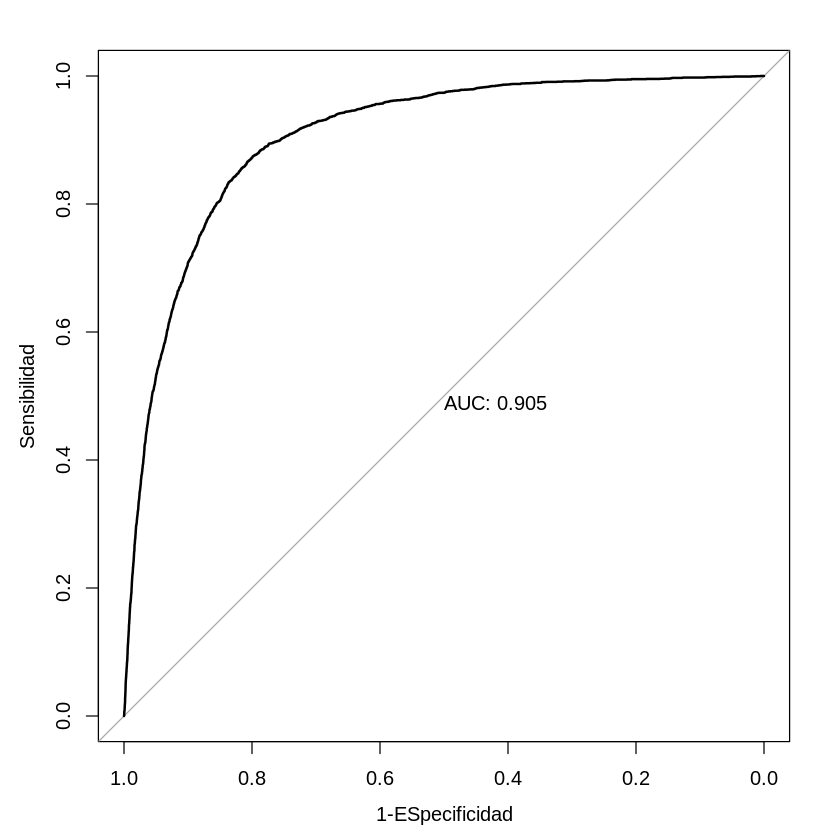

In [ ]:
plot.roc(roc_modelo,print.auc=T,xlab="1-ESpecificidad",ylab="Sensibilidad")

# ERGM

In [ ]:
df3 <- df2[,-c(2,5)]

In [ ]:
logmodelo2 <- glm(Subscription ~ ., binomial, data = df3)
summary(logmodelo2)


Call:
glm(formula = Subscription ~ ., family = binomial, data = df3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.3983  -0.4508  -0.2889  -0.1656   3.6767  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.309e+00  2.461e-01  -9.381  < 2e-16 ***
Age                    8.326e-03  2.009e-03   4.145 3.40e-05 ***
Marital.Status         2.606e-01  3.718e-02   7.011 2.37e-12 ***
Education              1.909e-01  2.744e-02   6.958 3.45e-12 ***
Balance..euros.        2.110e-05  5.222e-06   4.041 5.31e-05 ***
Housing.Loan          -1.029e+00  4.514e-02 -22.799  < 2e-16 ***
Personal.Loan         -7.268e-01  6.838e-02 -10.629  < 2e-16 ***
Contact               -6.402e-01  3.222e-02 -19.871  < 2e-16 ***
Last.Contact.Day      -6.216e-03  2.476e-03  -2.510   0.0121 *  
Last.Contact.Month     3.540e-02  6.629e-03   5.341 9.25e-08 ***
Last.Contact.Duration  3.927e-03  7.305e-05  53.754  < 2e-16 ***
Campaign             

## Evaluación

In [ ]:
proyectado2<-ifelse(logmodelo2$fitted.values>0.5,1,0)
table(df3$Subscription, proyectado2)

   proyectado2
        0     1
  0 27414   537
  1  2894   803

In [ ]:
roc_modelo2 <- roc(df3$Subscription, logmodelo2$fitted.values,auc=T)
roc_modelo2

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df3$Subscription, predictor = logmodelo2$fitted.values,     auc = T)

Data: logmodelo2$fitted.values in 27951 controls (df3$Subscription 0) < 3697 cases (df3$Subscription 1).
Area under the curve: 0.8695

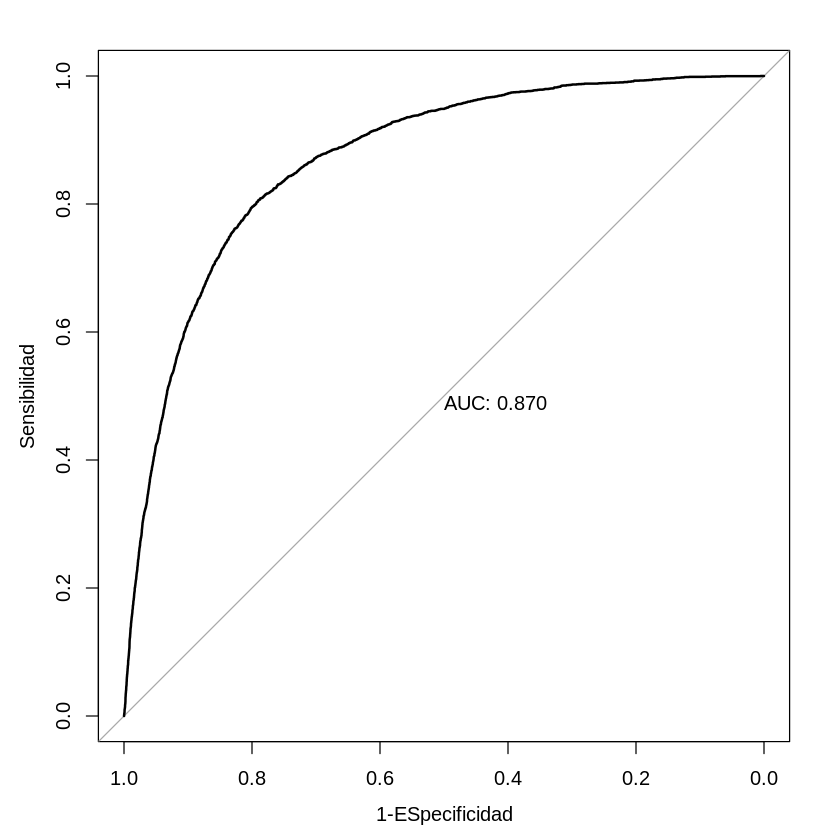

In [ ]:
plot.roc(roc_modelo2,print.auc=T,xlab="1-ESpecificidad",ylab="Sensibilidad")

# STERGM

## Modelo

In [ ]:
modelo_lda <- lda(Subscription~., data = df2)
modelo_lda

Call:
lda(Subscription ~ ., data = df2)

Prior probabilities of groups:
        0         1 
0.8831838 0.1168162 

Group means:
       Age      Job Marital.Status Education   Credit Balance..euros.
0 40.85303 5.302243       2.158563  2.208615 1.019534        1315.104
1 41.50690 5.726806       2.257236  2.359481 1.010008        1847.865
  Housing.Loan Personal.Loan  Contact Last.Contact.Day Last.Contact.Month
0     1.576867      1.170083 1.689600         15.90548           6.539372
1     1.364890      1.090614 1.272113         15.05626           6.305112
  Last.Contact.Duration Campaign    Pdays  Previous Poutcome
0              220.3123 2.846410 35.97617 0.5048835 3.591106
1              532.2529 2.123884 69.86773 1.2004328 3.340276

Coefficients of linear discriminants:
                                LD1
Age                    5.861780e-03
Job                    9.789116e-03
Marital.Status         1.625116e-01
Education              1.206143e-01
Credit                -1.757473e-01
Ba

## Evaluación

In [ ]:
predicciones <- predict(object = modelo_lda, newdata = df2,type="prob")

roc_modelolda <- multiclass.roc(df2$Subscription, predicciones$posterior)
roc_modelolda


Call:
multiclass.roc.default(response = df2$Subscription, predictor = predicciones$posterior)

Data: multivariate predictor predicciones$posterior with 2 levels of df2$Subscription: 0, 1.
Multi-class area under the curve: 0.8698

In [ ]:
unique(df$Job)
unique(df$Marital.Status)
unique(df$Education)
unique(df$Credit)
unique(df$Housing.Loan)
unique(df$Personal.Loan)
unique(df$Contact)
unique(df$Poutcome)

[1] "management"    "technician"    "entrepreneur"  "blue-collar"  
 [5] "retired"       "services"      "admin."        "self-employed"
 [9] "unemployed"    "housemaid"     "student"       "unknown"

[1] "married"  "single"   "divorced"

[1] "tertiary"  "secondary" "unknown"   "primary"

[1] "no"  "yes"

[1] "yes" "no"

[1] "no"  "yes"

[1] "unknown"   "cellular"  "telephone"

[1] "unknown" "failure" "other"   "success"

In [ ]:
df4 <- df

In [ ]:
df4 <- within(df4, {
  Education.num <- 0
  Education.num[Education == 'unknown'] <- 0
  Education.num[Education == 'primary'] <- 1
  Education.num[Education == 'secondary'] <- 2
  Education.num[Education == 'tertiary'] <- 3
   } )

In [ ]:
df4 <- within(df4, {
  Contact.num <- 0
  Contact.num[Contact == 'unknown'] <- 0
  Contact.num[Contact == 'cellular'] <- 1
  Contact.num[Contact == 'telephone'] <- 2
   } )

In [ ]:
df4 <- within(df4, {
  Poutcome.num <- 0
  Poutcome.num[Poutcome == 'unknown'] <- 0
  Poutcome.num[Poutcome == 'failure'] <- 1
  Poutcome.num[Poutcome == 'other'] <- 2
  Poutcome.num[Poutcome == 'success'] <- 3
   } )

In [ ]:
df4 <- within(df4, {
  Credit.num <- 0
  Credit.num[Credit == 'yes'] <- 1
  Credit.num[Credit == 'no'] <- 0
   } )

In [ ]:
df4 <- within(df4, {
  Personal.Loan.num <- 0
  Personal.Loan.num[Personal.Loan == 'yes'] <- 1
  Personal.Loan.num[Personal.Loan == 'no'] <- 0
   } )

In [ ]:
df4 <- within(df4, {
  Housing.Loan.num <- 0
  Housing.Loan.num[Housing.Loan == 'yes'] <- 1
  Housing.Loan.num[Housing.Loan == 'no'] <- 0
   } )

In [ ]:
df4 <- within(df4, {
  Education.num <- 0
  Education.num[Education == 'unknown'] <- 0
  Education.num[Education == 'primary'] <- 1
  Education.num[Education == 'secondary'] <- 2
  Education.num[Education == 'tertiary'] <- 3
   } )

In [ ]:
df4 <- within(df4, {
  Marital.Status.num <- 0
  Marital.Status.num[Marital.Status == 'married'] <- 1
  Marital.Status.num[Marital.Status == 'single'] <- 2
  Marital.Status.num[Marital.Status == 'divorced'] <- 3
   } )

In [ ]:
df4 <- within(df4, {
  Job.num <- 0
  Job.num[Job == 'unknown'] <- 0
  Job.num[Job == 'management'] <- 1
  Job.num[Job == 'technician'] <- 2
  Job.num[Job == 'entrepreneur'] <- 3
  Job.num[Job == 'blue-collar'] <- 4
  Job.num[Job == 'retired'] <- 5
  Job.num[Job == 'services'] <- 6
  Job.num[Job == 'admin.'] <- 7
  Job.num[Job == 'self-employed'] <- 8
  Job.num[Job == 'unemployed'] <- 9
  Job.num[Job == 'housemaid'] <- 10
  Job.num[Job == 'student'] <- 11
   } )

In [ ]:
str(df4)

'data.frame':	31648 obs. of  25 variables:
 $ Age                  : int  58 44 33 47 35 28 42 58 43 53 ...
 $ Job                  : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ Marital.Status       : chr  "married" "single" "married" "married" ...
 $ Education            : chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ Credit               : chr  "no" "no" "no" "no" ...
 $ Balance..euros.      : int  2143 29 2 1506 231 447 2 121 593 6 ...
 $ Housing.Loan         : chr  "yes" "yes" "yes" "yes" ...
 $ Personal.Loan        : chr  "no" "no" "yes" "no" ...
 $ Contact              : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ Last.Contact.Day     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Last.Contact.Month   : chr  "may" "may" "may" "may" ...
 $ Last.Contact.Duration: int  261 151 76 92 139 217 380 50 55 517 ...
 $ Campaign             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Pdays                : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ Previous             : in

In [ ]:
unique(df4$Job.num)
unique(df4$Marital.Status.num)
unique(df4$Education.num)
unique(df4$Credit.num)
unique(df4$Housing.Loan.num)
unique(df4$Personal.Loan.num)
unique(df4$Contact.num)
unique(df4$Poutcome.num)

[1]  1  2  3  4  5  6  7  8  9 10 11  0

[1] 1 2 3

[1] 3 2 0 1

[1] 0 1

[1] 1 0

[1] 0 1

[1] 0 1 2

[1] 0 1 2 3

In [ ]:
df5 <- df4[,c(1,6,10,12,13,14,15,17,18,19,20,21,22,23,24,25)]